C:\Users\600011584\AppData\Local\Temp\ipykernel_14064\4183337404.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Stopień wierzchołka')


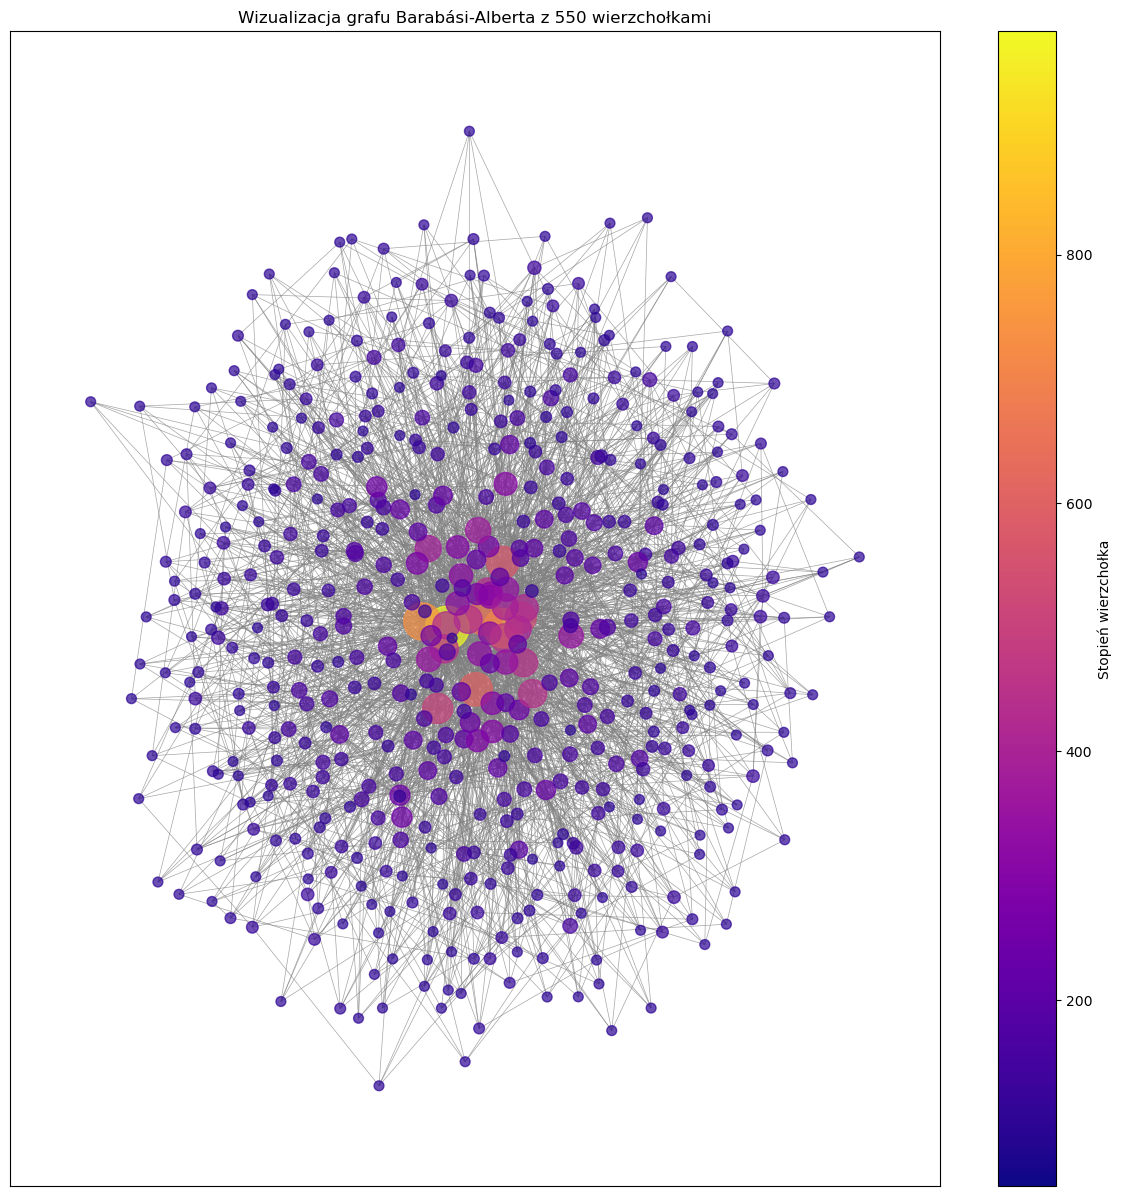

In [1]:
# Praca domowa 6 - TWD
# Nazarii Bihniak

# Wizualizacja przedstawia graf Barabási-Alberta z 550 wierzchołkami. 
# W tym modelu grafu niektóre wierzchołki mają znacznie więcej połączeń niż inne, co jest charakterystyczne 
# dla sieci bezskalowych i może stanowić wyzwanie wizualizacyjne.
# Właśnie, tak to jest.

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Utworzenie grafu Barabási-Alberta z ponad 500 wierzchołkami
N = 550  # liczba wierzchołków
m = 5    # liczba krawędzi do dołączenia z każdym nowym wierzchołkiem

# Tworzenie grafu
graph = nx.barabasi_albert_graph(N, m)

# Ustalenie wielkości wierzchołków na podstawie stopnia wierzchołka
node_sizes = [graph.degree(n) * 10 for n in graph.nodes()]

# Ustalenie szerokości krawędzi na podstawie najkrótszej ścieżki (dystansu) między wierzchołkami
# (dłuższe ścieżki = cieńsze krawędzie)
path_lengths = dict(nx.all_pairs_shortest_path_length(graph))
edge_widths = [1 / (path_lengths[u][v] + 1) for u, v in graph.edges()]

# Ustalenie kolorów wierzchołków
node_colors = [plt.cm.plasma(graph.degree(n) / max(dict(graph.degree()).values())) for n in graph.nodes()]

# Rysowanie grafu
plt.figure(figsize=(15, 15))
nx.draw_networkx(graph, 
                 node_size=node_sizes, 
                 width=edge_widths, 
                 node_color=node_colors, 
                 with_labels=False,
                 edge_color="grey",
                 alpha=0.7)

# Dodanie legendy dla kolorów
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))
plt.colorbar(sm, label='Stopień wierzchołka')

plt.title("Wizualizacja grafu Barabási-Alberta z 550 wierzchołkami")
plt.show()
